<a href="https://colab.research.google.com/github/tbonne/IntroPychStats/blob/main/notebooks/lm_compare_two_groups_fate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1Kn0ZllPYV8NAxE4lDukMecpRQ088GjwY' width=300>

#<font color='darkorange'>Comparing two groups</font>

In this notebook we'll use the belief in fate dataset to learn how to use linear regression to compare between two groups.
> i.e., does the belief in fate differ between two groups of subjects?
  

If you remember from early on in the course we saw that in this study the researchers randomly assigned subjects into two groups. Then one group was given a question where they tempted fate (did not do the reading) and the other group did not tempt fate (they did the reading). The question was then asked: how likely are you to be called on in class.
> Note: they randomly assigned individuals into two groups to ensure that the two groups are very similar, and the only difference is the question they were asked.  


### 1. Load in the data

Lets load in some packages. These have functions that other people have made, and will hopefully make our lives a lot easier!

In [1]:
install.packages("jtools")
install.packages("ggstance")
library(jtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pander’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Then let's load in the [belief in fate dataset](https://journals.sagepub.com/doi/full/10.1177/2515245918810225).

In [24]:
#here we will read in a csv file and place it into something called df
df_fate <- read.csv("https://raw.githubusercontent.com/tbonne/IntroPychStats/main/data/Risen_study.csv", header = T)

#let's take a look at the data
head(df_fate)

,userID,Response,Question,Country,Location,Language,Setting,Online
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,3,Unprepared,Australia,"University of New South Wales, Sydney, Australia",English,Online (at home),online
2,3,2,Unprepared,Australia,"University of New South Wales, Sydney, Australia",English,Online (at home),online
3,4,2,Unprepared,Australia,"University of New South Wales, Sydney, Australia",English,Online (at home),online
4,6,2,Unprepared,Australia,"University of New South Wales, Sydney, Australia",English,Online (at home),online
5,9,7,Unprepared,Australia,"University of New South Wales, Sydney, Australia",English,Online (at home),online
6,10,6,Unprepared,Australia,"University of New South Wales, Sydney, Australia",English,Online (at home),online


Our question here is:
> Can the group the subject was in help predict their response?
  
> I.e., if they were in the group that was given the question where they did not read, does that help predict their response (1-10)?

### 2. Visualize our data

Then let's plot the scatterplot. Here we will choose: 
> What we'd like to predict and put it on the y-axis.

> What we'd like to use to help make those predictions and put it on the x-axis.

> The choice of these variables should follow from the question you're asking above!


<font color = "darkred"> (?) for the question mark below you should replace it with the column name that you'd like to predict (y=?) and what you'd like to use to help make those predictions (x=?). </font>

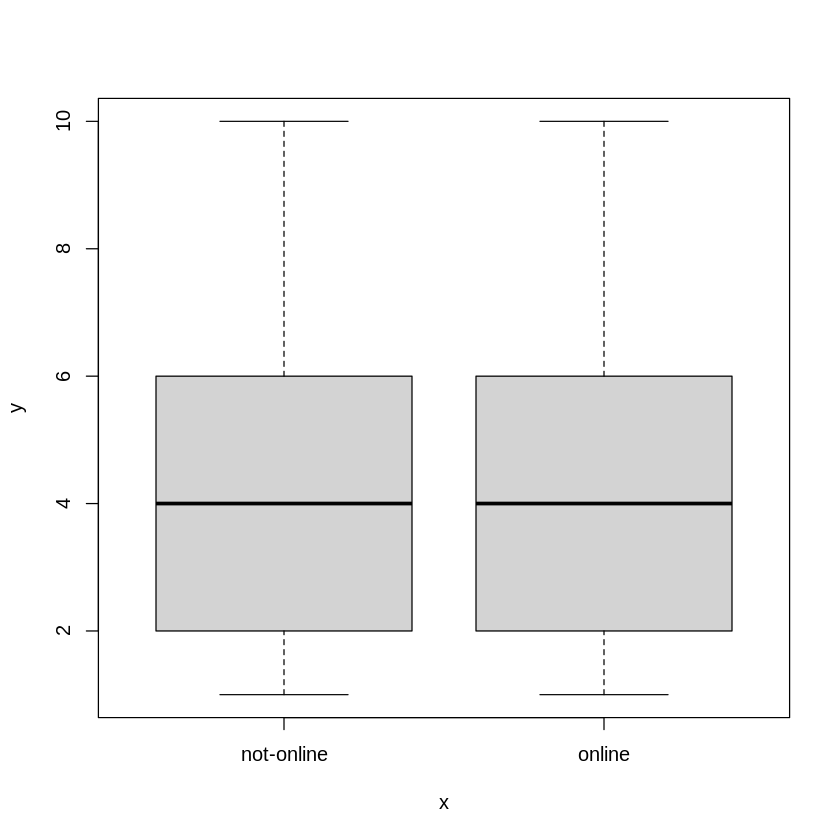

In [25]:
plot(x=factor(df_fate$Setting),y=df_fate$Response) 

Because the variable we are using to make the predictions is a categorical variable the plots are going to look a little different. The above plot is called a boxplot and it summarises how the response (on the y-axis) are spread out.

> The middle line is the median.

> The box itself is the region where the most common values lie.

> Then the dashed line and horizontal lines (whiskers) is the region that covers almost all the data

> For more info check out [this link](https://www.simplypsychology.org/boxplots.html)

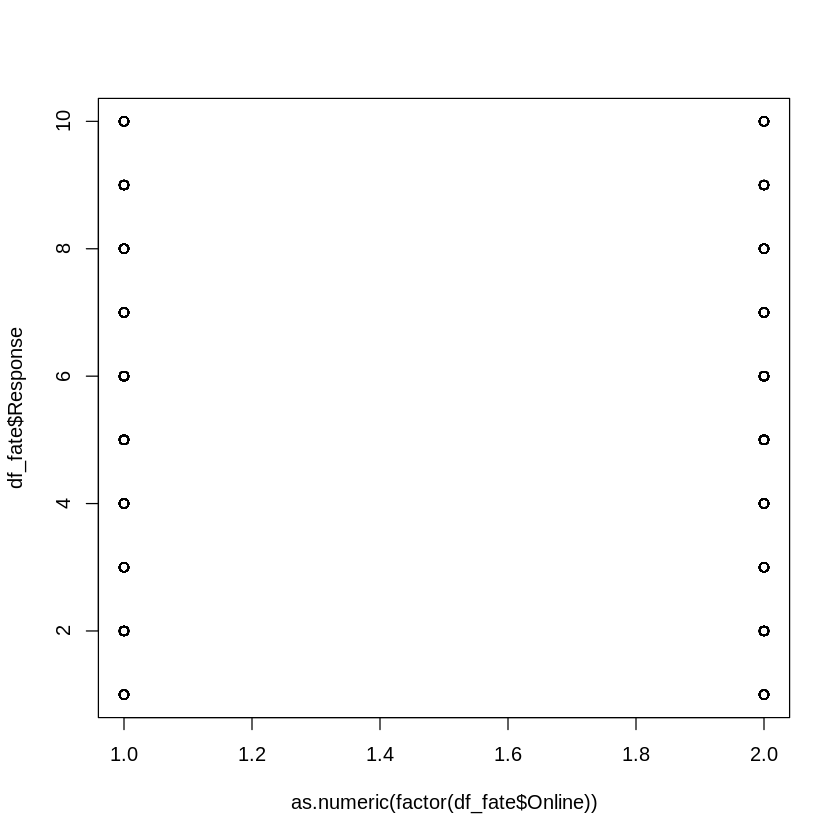

In [26]:
plot(x=as.numeric(factor(df_fate$Question)),y=df_fate$Response) 

### 3. Define and fit our model

Now we can speficy the model we'd like to fit.
> Remember, here we use the formula: "what we'd like to predict" ~ "what we'd like to use to help make those predictions."
  

<font color = "darkred"> (?) for the question mark below you should replace it with the formula that will help you answer your question. </font>

In [27]:
#fit a linear model
model_fate <- lm(?, data=df_fate)


This bit of code then use our inputs to find the best fit linear equation for :
> Response ~ Normal(mu, sd) 

> mu = a + b*Question


Let's use the summ function to tell us what values of a and b it found for the best fit line. 
> Note: we'll also calculate our 95% confidence interval here too!

In [28]:
#What does the best fit model look like?
summ(model_fate, confint=TRUE)

MODEL INFO:
Observations: 4599
Dependent Variable: Response
Type: OLS linear regression 

MODEL FIT:
F(1,4597) = 8.93, p = 0.00
R² = 0.00
Adj. R² = 0.00 

Standard errors: OLS
----------------------------------------------------------
                      Est.    2.5%   97.5%   t val.      p
------------------ ------- ------- ------- -------- ------
(Intercept)           4.43    4.34    4.52    94.54   0.00
Onlineonline         -0.21   -0.35   -0.07    -2.99   0.00
----------------------------------------------------------

We can see from this output that the model is pretty certain that the if subjects are asked the uprepared questoin they are likely to response between 0.40 and 0.67 units higher than the prepared group.

> Those are the range of population values that are compatible with our sample!
  
We can also get a sense of how much variation in responses our model is predicting using R2.

> I.e., it is explaining very little in why some response are high and others low!

### 4. Visualize the results

Let's take a look at the estimates a little more visually

Loading required namespace: broom.mixed



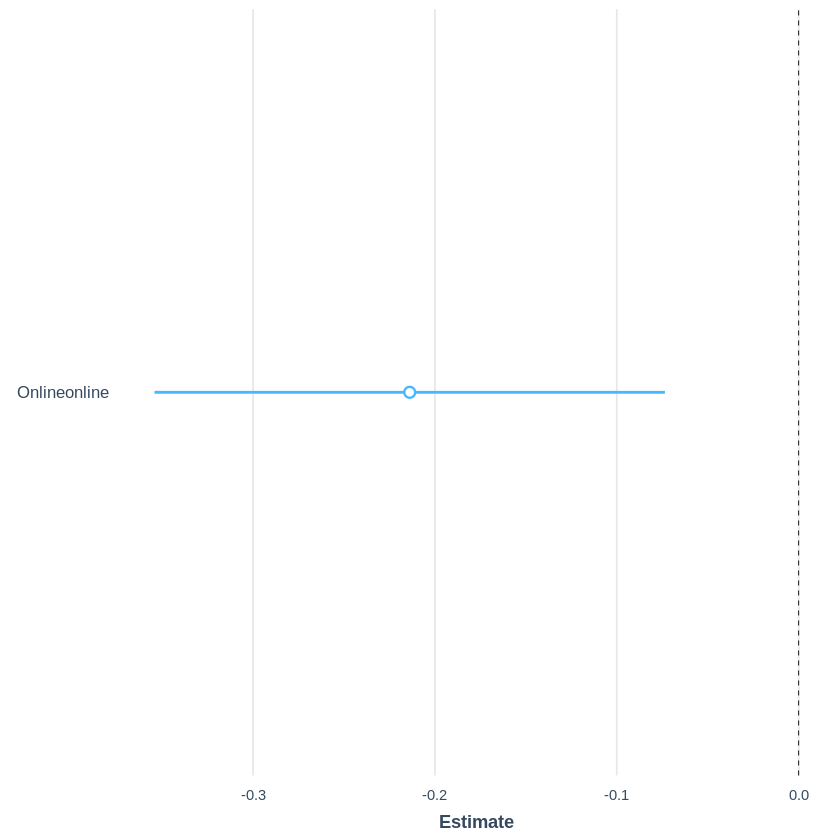

In [29]:
#plot the estimates of the slopes
plot_summs(model_fate)

Let's take a look at the regression line a little more visually

<font color = "darkred"> (?) for the question mark below you should replace it with the variable that you used to help make your predictions. </font>

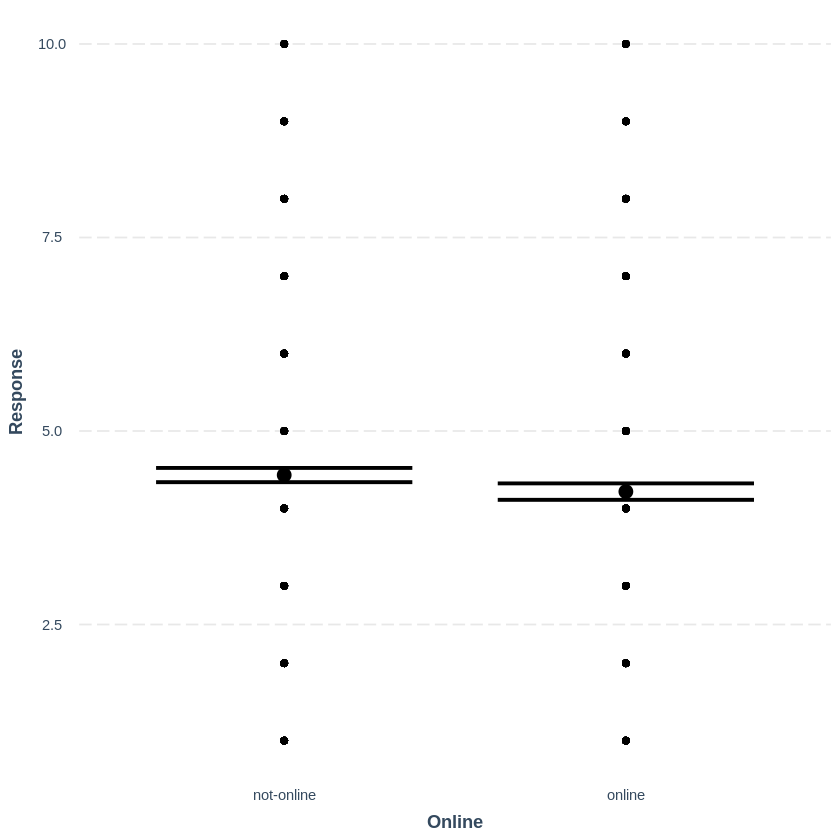

In [31]:
#plot line on the data
effect_plot(model_fate, pred = ?, interval = TRUE, plot.points = TRUE)

The plot above shows us the estimated mean response for each of the questions. This mean is represented as a black point. Then the 95% confidence interval is shown as two black horizontal lines, above and below the estimated mean value.

### 5. Checking assumptions

**Assumption 1**

Let's check the assumption that the errors (residuals) are normally distributed.

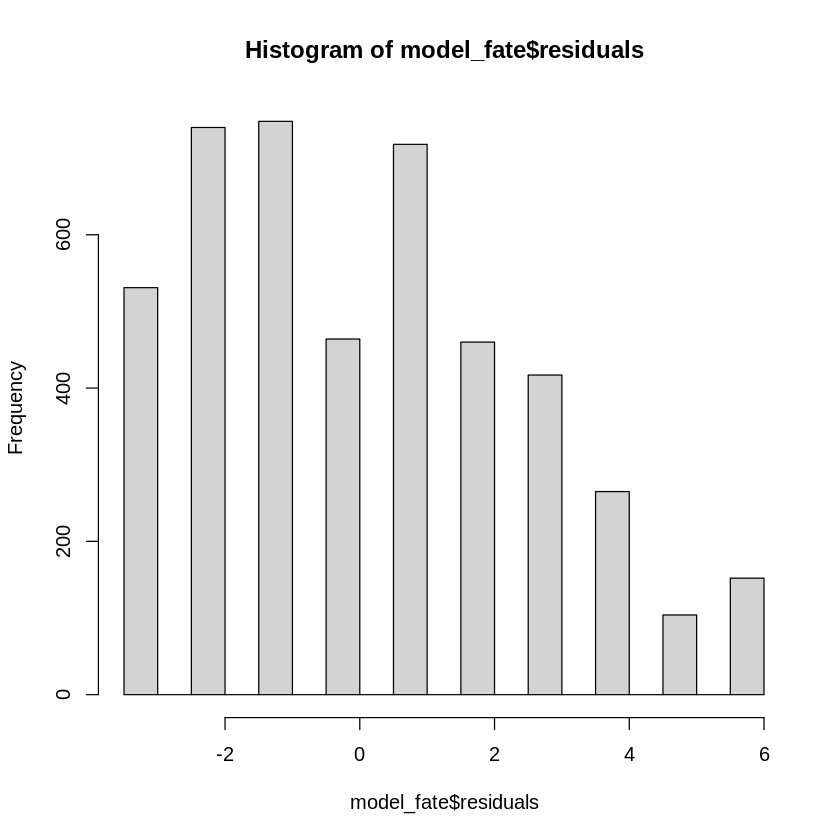

In [32]:
hist(model_fate$residuals)

The above plot is just like the histograms we've looked at in the past. Now we are looking at how errors are distributed.

> If the errors do not look to have many small errors and few large errors (both positive and negative) then a normal distribution might not be the best model of the data. We might also be missing an important variable...

**Assumption 2** - no patterns in the residuals
  
Let's check the assumption that the variance in the errors is constant.

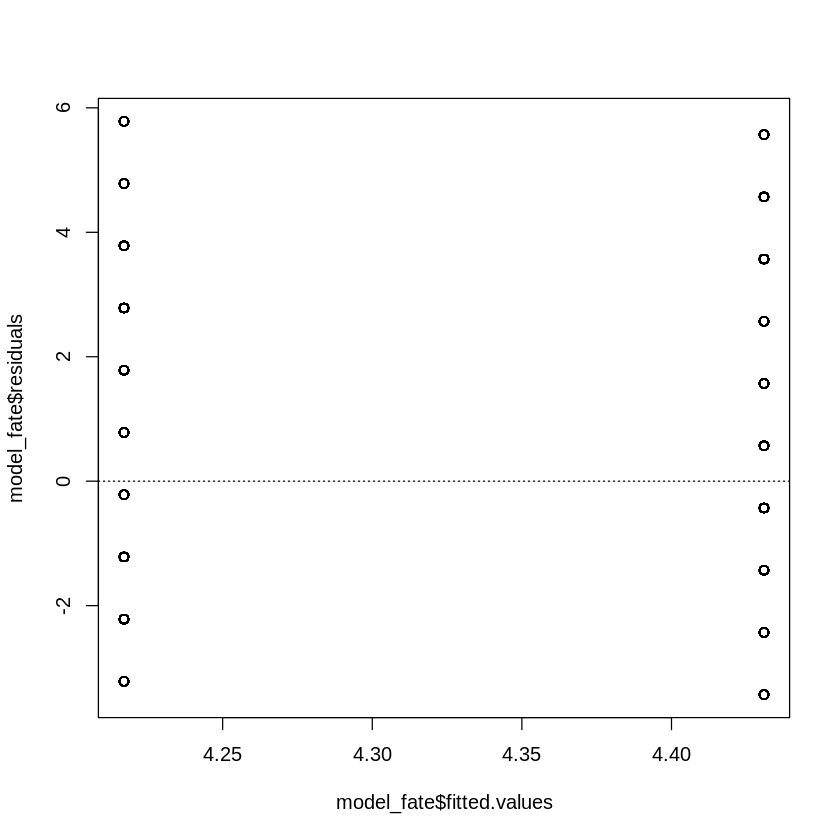

In [33]:
plot(y=model_fate$residuals, x=model_fate$fitted.values)
abline(h = 0, lty=3)

The above plot shows you all the errors (residuals) for each value that the model predicts. Ideally, we'd like to see errors evenly distributed around 0 (i.e., the dashed line).

> If there is more variance in the errors for some prediction values then this means the model is better at predicting some values than others. 

**Assumption 2** - no patterns in the residuals
   
Let's check the assumption that the relationship between your variables is linear (i.e., that a straight line and not a curvy line fit the data best). We can see this intuatively in the origianl scatter plot, or we can look at the residuals!

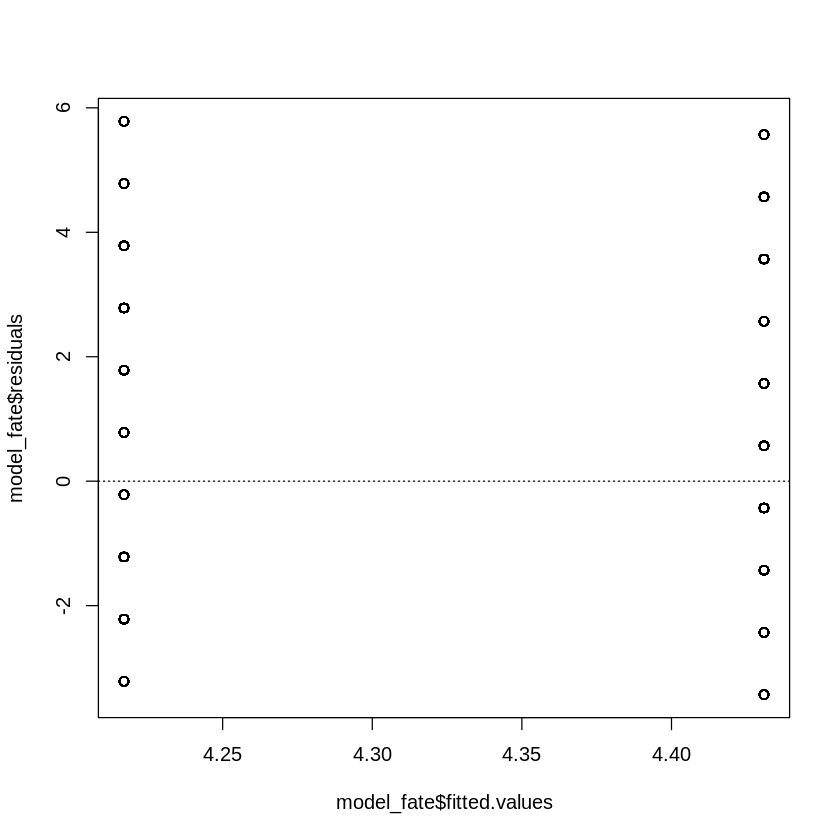

In [34]:
plot(y=model_fate$residuals, x=model_fate$fitted.values)
abline(h = 0, lty=3)

The plot above is just the line fit to the scatterplot we saw before. Intuatively you can check to see if the straight line fits the data, or if a curvy line might fit better.

There are two things to keep in mind when checking the assumptions of the linear regression.

> The first is that the assumptions do not need to be perfect to give you a resonable estimate.

> The second is that often the way the model fails can help you build a better model.

### 6. Interpret the results

From the results above what can you answer the question you posed in section 1?  
> What is the association between the two variables that you tested?

> What does the confidence interval tell you about how certain you are in the sign and magnitude of that association?

> How "good" are your model predictions?
